# NetSciX-26 Notebook A

In this notebook we will apply community-detection methods to cluster nodes of networks in tidely connected groups (assortative structures). We will use:

- The Kernighan-Lin method for graph bisection.

- The Louvain method to maximize the Modularity.

- Greedy agglomerative approaches to maximize the Modularity.

The Karate Club network will be again used as a representative case to illustrate the application of these methods.

We will use the [NetworkX](https://networkx.org/en/) packages that can be installed running (in a cell or command line):

``
!pip install networkx
``

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

gk = nx.karate_club_graph()
layout = nx.spring_layout(gk)
L=gk.number_of_edges()
N=gk.number_of_nodes()

# 1. Introduction

## 1.1 - The communities module in networkX

NetworkX functions related to communities are stored in a module that has to be imported separately:

In [2]:
from networkx.algorithms import community

A useful tool in networkX is to work with **partitions** of the nodes in communities. A partition is an exhaustive and mutually exclusive subsets of the nodes. The problem of community detection is to find the <i> best </i> partition, where the definition of best varies across different problems and methods.

In networkX, the partitions are given by lists of sets, which we can test if they satisfiy the definition of a partition. 

- For example, here is a partition with two communities:

In [3]:
part2=[set(range(0,3)),set(range(3,N))]
print(part2)
print(community.is_partition(gk,part2))

[{0, 1, 2}, {3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
True


- This is the partition with each node in its own partition

In [4]:
partN=[]
for i in range(N):
    partN.append(set([i]))
print(partN)
print(community.is_partition(gk,partN))

[{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}]
True


- This is not a partition (Can you see why?):

In [5]:
part2b=[set(range(0,4)),set(range(3,N))]
print(part2b)
print(community.is_partition(gk,part2b))

[{0, 1, 2, 3}, {3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
False


- This is the club partition

In [6]:
club1=[]
club2=[]
for i in range(N):
    if gk.nodes[i]['club']=="Mr. Hi":
        club1.append(i)
    else:
        club2.append(i)
partClub = [set(club1),set(club2)]
print(partClub)
print(community.is_partition(gk,partClub))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]
True


Here is a small function that maps the partion to a list:

In [7]:
def partToList(part):
    '''Print partition as a list'''
    N=0
    for b in range(len(part)):
        N=N+len(part[b])
    listP=np.zeros(N)
    for b in range(len(part)):
        for n in part[b]:
            listP[n]=b
    return(listP)

This is useful for plotting nodes in different communities using different colors:

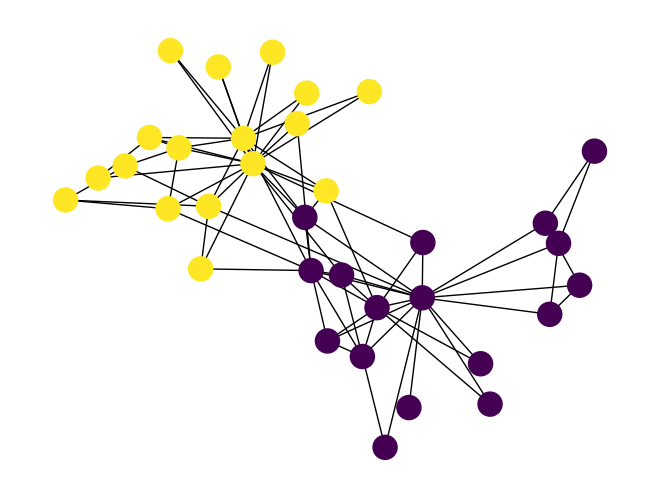

In [8]:
nx.draw(gk,pos=layout,node_color=partToList(partClub))

Here is a small function that merges two partitions:

In [9]:
def mergePartition(part,n1,n2):
    '''Merge the communities n1 and n2 in partition part'''
    B=len(part) 
    partBack=[] # the new partition to be created
    if n1 > B or n2 > B: #checking if request is meaningful
        print("Error, B>n")
        return 0
    partBack.append(set.union(part[n1],part[n2])) #the merged partitions
    for b in range(B): #all other partitions remain the same
        if b !=n1 and b!=n2:
            partBack.append(part[b])
    return(partBack)

In [10]:
partN2=mergePartition(partN,3,4)
print("Original partition:",partN)
print("New partition:",partN2)
print(community.is_partition(gk,partN2))

Original partition: [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}]
New partition: [{3, 4}, {0}, {1}, {2}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}]
True


## 1.2 Methods: 

## Bi-section

In [11]:
community.kernighan_lin_bisection(gk)

({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21},
 {8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

## Modularity based methods

Here is the modularity of different partitions. Think about the values of the modularity.

All nodes in one partition:

In [12]:
part1=[set(range(0,N))]
print(part1)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


In [13]:
community.is_partition(gk,part1)

True

In [14]:
community.modularity(gk,part1)

0.0

All nodes in its own partition:

In [15]:
community.modularity(gk,partN)

-0.05110473941642772

Club partition

In [16]:
community.modularity(gk,partClub)

0.39143756676224206

Partition obtained bi-secting the network in 2 equal sized groups with minimal number of links across them:

In [17]:
community.modularity(gk,community.kernighan_lin_bisection(gk))

0.3998332115215232

Partition obtained maximizing the modularity using a greedy approach:

In [18]:
partGreedy = community.greedy_modularity_communities(gk)
community.modularity(gk,partGreedy)

0.41096493693896297

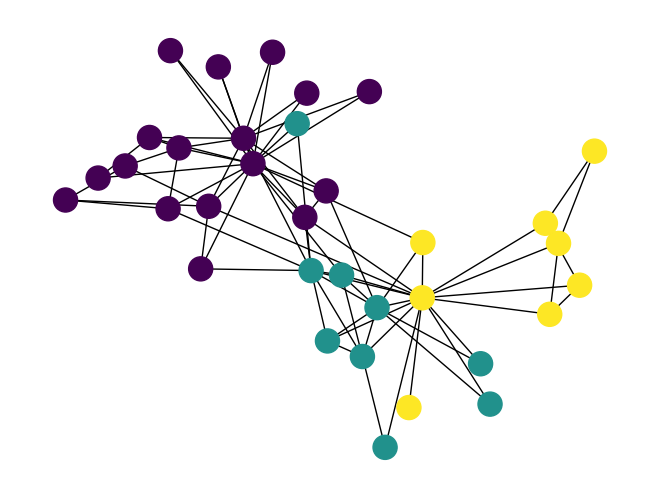

In [19]:
nx.draw(gk,pos=layout,node_color=partToList(partGreedy))

Partition obtained maximizing the modularity using the Louvain method:

In [20]:
partLouvain = community.louvain_communities(gk)
community.modularity(gk,partLouvain)

0.4438541256723075

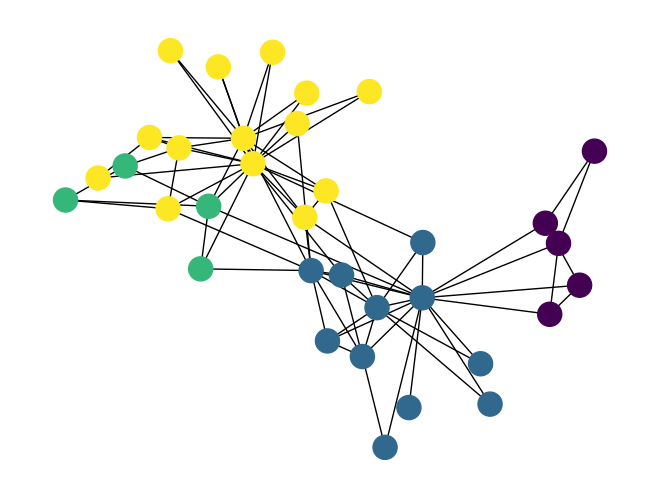

In [21]:
nx.draw(gk,pos=layout,node_color=partToList(partLouvain))

## 1.3 Other methods available in networkX

 - The networkX package has also different community-detection methods which you can explore in the link:
 https://networkx.org/documentation/stable/reference/algorithms/community.html
 - or using the "help" command as below.
``` help(community)```

# 2. Manually coded greedy algorithm

Starting from the trivial case with $B=N$ partitions, we use a greedy aglomerative approach to find partitions of the Karate Club for $B$ from $B=N=34$ to $B=2$. We then plot the Modularity of these partitions as a function of $B$:

In [22]:
def findMaxMerge(gk,part):
    '''Find the merge that maximizes the modularity'''
    maxM=-1*np.inf
    maxMerge=(0,0)
    for i in range(len(part)):
        for j in range(i): #Loop over all pairs of communities in partitions
            partTemp=mergePartition(part,i,j) # the partition obtained after merging
            if community.modularity(gk,partTemp)>maxM: #store if larger community found yet
                maxM=community.modularity(gk,partTemp)
                maxMerge=(i,j)
    return(maxMerge) #return the pair i,j that maximized the modularity after merge

In [23]:
findMaxMerge(gk,partN)

(31, 25)

In [24]:
part=partN
allPartition=[part] # Store all best partitions
print(len(part),community.modularity(gk,part))
while len(part)>1:
    ij=findMaxMerge(gk,part)
#    print(ij,len(part),part)
    part=mergePartition(part,ij[0],ij[1])
    allPartition.append(part)
    print(len(part),community.modularity(gk,part))


34 -0.05110473941642772
33 -0.023556530050036543
32 -0.003616873746743866
31 0.0208391896703585
30 0.03786473266992746
29 0.06260190026423797
28 0.08823860122561424
27 0.12404190326268236
26 0.1543449335657126
25 0.17093008002098894
24 0.18595041322314035
23 0.2007083825265642
22 0.22195985832349455
21 0.23972564232304483
20 0.25617960682895763
19 0.27585689923352275
18 0.2933884297520662
17 0.3062255205112349
16 0.31882835778939683
15 0.3312156818650326
14 0.3479132699911921
13 0.35953224264912576
12 0.3710012930792152
11 0.38223609002829784
10 0.39213095706602197
9 0.40195086298982396
8 0.4102996570529037
7 0.41856411986282105
6 0.425872828470231
5 0.43166357452071735
4 0.4343902850396356
3 0.4345214669889994
2 0.40362811791383213
1 0.0


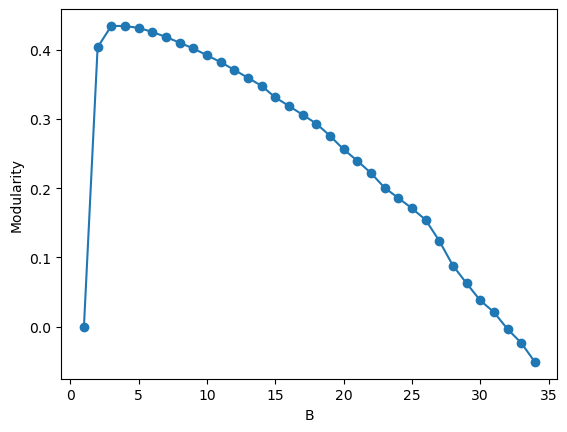

In [25]:
x=[]
y=[]
for i in allPartition:
    x.append(len(i))
    y.append(community.modularity(gk,i))
plt.plot(x,y,"-o")
plt.xlabel("B")
plt.ylabel("Modularity")
plt.show()

We now Consider the partitions found for $B=2,3 $ and $4$:

Coded greedy method: 0.40362811791383213


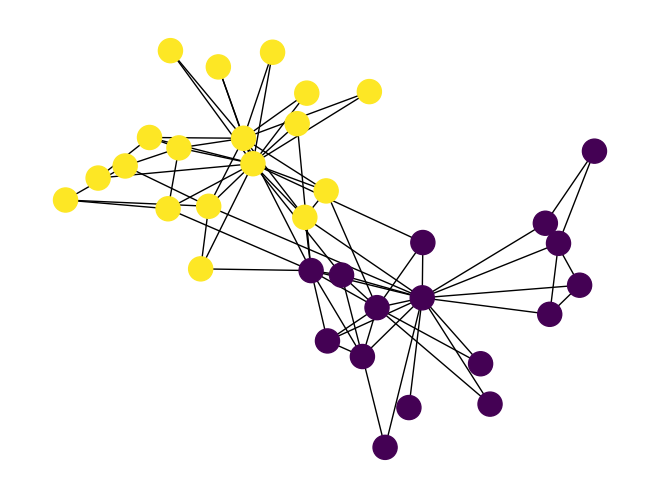

In [26]:
nx.draw(gk,pos=layout,node_color=partToList(allPartition[-2]))
print("Coded greedy method:",community.modularity(gk,allPartition[-2]))

Coded greedy method: 0.4345214669889994


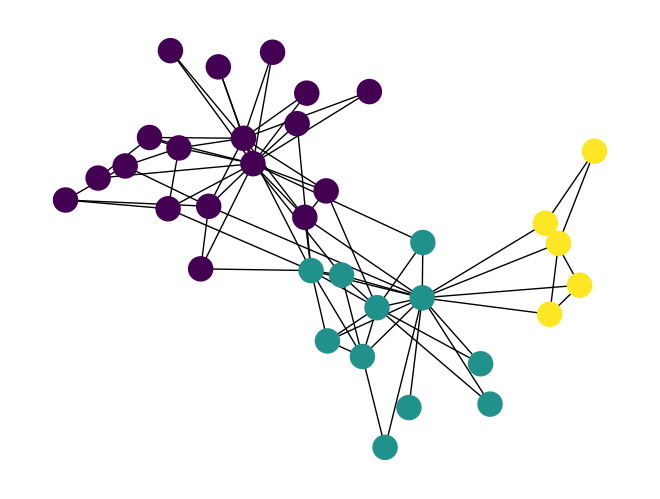

In [27]:
nx.draw(gk,pos=layout,node_color=partToList(allPartition[-3]))
print("Coded greedy method:",community.modularity(gk,allPartition[-3]))

Coded greedy method: 0.4343902850396356


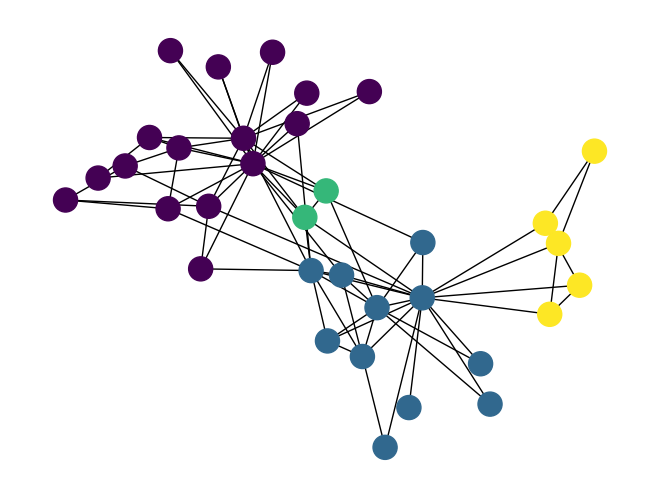

In [28]:
nx.draw(gk,pos=layout,node_color=partToList(allPartition[-4]))
print("Coded greedy method:",community.modularity(gk,allPartition[-4]))

### Questions 2:

Compare the partitions obtained using the manually coded greedy methods with $B=2,3,$ and $4$ to the Club partition and the results obtained using the NetworkX implementation of the Greedy and Louvain methods.

- Which is the best partition according to the Modularity?
- Are the partitions obtained in the manually coded method equivalent to the other partitions? Quantify how many changes are needed to map the partitions with the same $B$ to each other.

# 3. Random graphs

The goal here is to investigate the performance of modularity-maximization methods on random graph models. 

## 3.1 Stochastic block models (SBM)

Here we are interested in a SBM random graph with $B=5$ blocks, each block $r=1, 2, \ldots, B$ with $N_r=50$ nodes, and a matrix of edge probabilities $P_{rs}$ given by:

- $P_{rs}=0.2 \;$,  for $r=s$ (i.e., for links between nodes in the same group),
- $P_{rs}=q\;$,  for $r\neq s$ (i.e., for links between nodes in different groups),

with $q\in[0,0.2]$. Such graphs can be generated from ```nx.stochastic_block_model(sizes,p)```

In [29]:
sizes=[50,50,50,50,50]
qmax=0.2
q=0.001
p=[[qmax-q,q,q,q,q],[q,qmax-q,q,q,q],[q,q,qmax-q,q,q],[q,q,q,qmax-q,q],[q,q,q,q,qmax-q]]
gsbm = nx.stochastic_block_model(sizes, p)

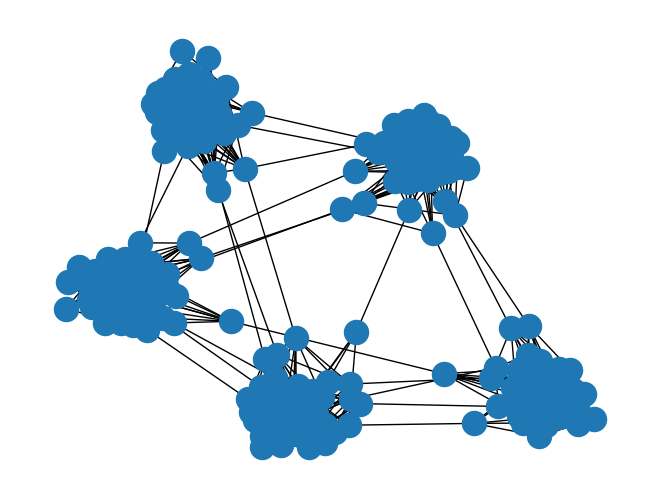

In [30]:
layoutSBM = nx.spring_layout(gsbm)
nx.draw(gsbm,pos=layoutSBM)

In [31]:
partL=community.louvain_communities(gsbm)
print(len(partL))
community.modularity(gsbm,partL)

5


0.7799069470572426

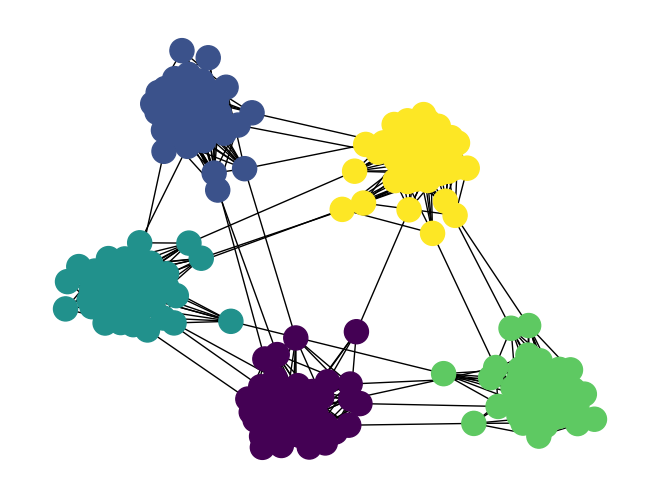

In [32]:
nx.draw(gsbm,node_color=partToList(partL),pos=layoutSBM)

## Questions

1. Discuss: What do you expect to happen for increasing $q$? 

2. Repeat the computations above for different values of $q$ in $q\in[0,0.2]$. Produce two plots with curves for the three methods:
- The number of communities $B$ as a function of $q$.
- The modularity of the best partition retrieved by the methods as a function of $q$.

## 3.2 Poisson Random graphs

Here we focus on Poisson random graphs with $\langle z \rangle =5$ and various N, which can be generated using ```nx.erdos_renyi_graph(N,p)``` as

In [33]:
N=100
avgz=5
p=avgz/(N-1)
g=nx.erdos_renyi_graph(N,p)

## Questions: 

How does $B$ change with $N$ in this case?

Compute the number of communities B for different $N$'s, including values $N<100$ and $N>100$. Plot $B$ vs $N$ in a double logarithmic plot and compare your numerical results with suitable scalings (e.g., a linear, polynomial, exponential). 

### Solutions:

### 2

We see that the partitions are similar, the number of changes needed to match them are:

partKL-partClub: 2 swaps needed, nodes 8 and 9

partKL-greedy:  1 swap needed, node 9

partClub-greedy: 1 swap needed, node 8

### 3.1

In [34]:
qstep=0.005
Bs=[]
Qs=[]
BLs=[]
QLs=[]
Blab=[]
Qlab=[]
for q in np.arange(0,qmax+qstep,qstep):
    #p=[[qmax-q,q,q,q,q],[q,qmax-q,q,q,q],[q,q,qmax-q,q,q],[q,q,q,qmax-q,q],[q,q,q,q,qmax-q]]
    p=[[qmax,q,q,q,q],[q,qmax,q,q,q],[q,q,qmax,q,q],[q,q,q,qmax,q],[q,q,q,q,qmax]]
    gsbm = nx.stochastic_block_model(sizes, p)
    part=community.greedy_modularity_communities(gsbm)
    partL=community.louvain_communities(gsbm)
    Bs.append(len(part))
    Qs.append(community.modularity(gsbm,part))
    BLs.append(len(partL))
    QLs.append(community.modularity(gsbm,partL))
    partLab=list(community.label_propagation_communities(gsbm))
    Blab.append(len(partLab))
    Qlab.append(community.modularity(gsbm,partLab))

#    print(q,"\t",len(part),"\t",community.modularity(gsbm,part))

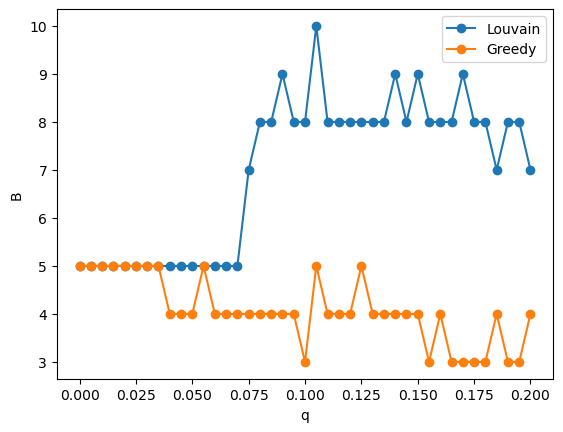

In [35]:
plt.plot(np.arange(0,qmax+qstep,qstep),BLs,"o-",label="Louvain")
plt.plot(np.arange(0,qmax+qstep,qstep),Bs,"o-",label="Greedy")
plt.xlabel("q")
plt.ylabel("B")
plt.legend()
plt.show()

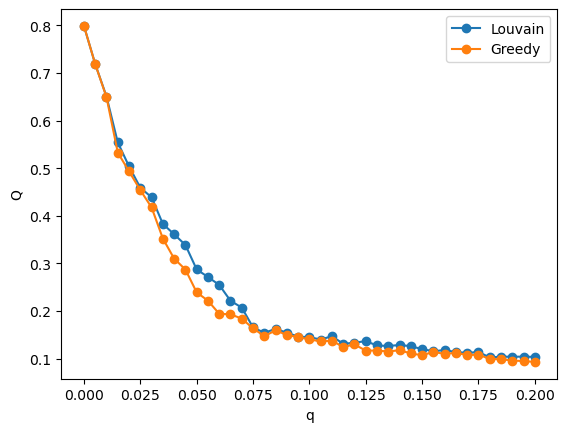

In [36]:
plt.plot(np.arange(0,qmax+qstep,qstep),QLs,"o-",label="Louvain")
plt.plot(np.arange(0,qmax+qstep,qstep),Qs,"o-",label="Greedy")
plt.xlabel("q")
plt.ylabel("Q")
plt.legend()
plt.show()

### Solutions 3.2:

In [37]:
Ns=[20,50,100,200,500,1000,2000,5000,10000,20000]
BL=[]
Bs=[]
for N in Ns:
    avgz=5
    p=avgz/(N-1)
    g=nx.erdos_renyi_graph(N,p)
    partGreedy = community.greedy_modularity_communities(g)
    partL = community.louvain_communities(g)
    Bs.append(len(partGreedy))
    BL.append(len(partL))
    print(N,len(partGreedy),len(partL))

20 3 5
50 5 6
100 8 9
200 10 12
500 15 17
1000 20 24
2000 30 38
5000 52 62
10000 99 115
20000 152 173


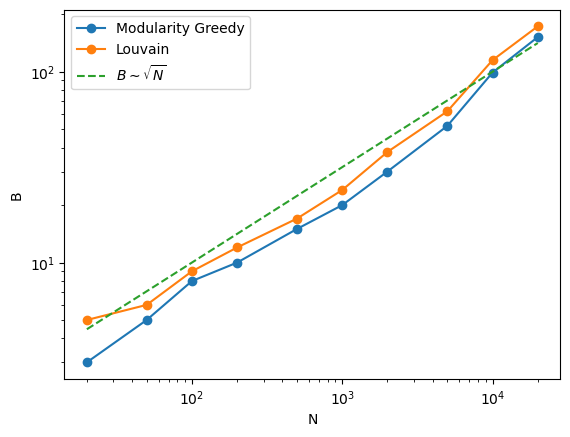

In [38]:
plt.plot(Ns,Bs,"-o",label="Modularity Greedy")
plt.plot(Ns,BL,"-o",label="Louvain")
plt.xlabel("N")
plt.ylabel("B")
plt.plot(np.array(Ns),np.sqrt(np.array(Ns)),"--",label=r"$B \sim \sqrt{N}$")
plt.loglog()
plt.legend()
plt.show()